In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 4

import sys;import os;
module_path = os.path.abspath(os.path.join('..')).split('PythonCode')[0]+'PythonCode'
if module_path not in sys.path: sys.path.append(module_path+"/")
    
import Plib.Stats.Regression as r

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


/Users/rob/opt/intelpython/latest/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 88 from PyObject
  return f(*args, **kwds)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## Linear and Non Linear Data

In [2]:
#Linear data sample
xl = 10 * np.random.RandomState(1).rand(50)
yl = 2 * xl - 5 + np.random.RandomState(1).randn(50)
plt.scatter(xl, yl);

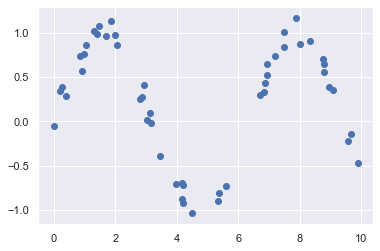

In [3]:
#non-linear sample
xnl = 10 * np.random.RandomState(1).rand(50)
ynl = np.sin(xnl) + 0.1 * np.random.RandomState(1).randn(50)
plt.scatter(xnl, ynl);

In [4]:
# Bidimensional data
data2=pd.DataFrame()
data2['xl']=xl
data2['yl']=yl

data2_nl=pd.DataFrame()
data2_nl['xl']=xnl
data2_nl['yl']=ynl

In [5]:
# Tridimensional data
data3=pd.DataFrame()
data3['xl']=xl
data3['zl']=yl*0.7+1
data3['yl']=yl

data3_nl=pd.DataFrame()
data3_nl['xl']=xnl
data3_nl['zl']=ynl*0.7+1
data3_nl['yl']=ynl

### Uni-MultiVariate Linear Regression

In [6]:
X,Y=r.splitMatrix(data2,'yl')
yhat,mse,lm=r.linReg(X,Y,table=True,Plot=True)
ret=r.printStats(lm,X,Y)

MSE: [0.97248206]
   SS_Residual     SS_Total  R_squared  AdjR_squared
0    46.679139  1856.374012   0.974855      0.974331
   Coefficients  Standard Errors  t values  Probabilities
0       -4.8216            0.255   -18.918            0.0
1        1.9588            0.046    42.878            0.0


In [7]:
X,Y=r.splitMatrix(data3,'yl')
yhat,mse,lm=r.linReg(X,Y,table=True)

In [8]:
ret=r.printStats(lm,X,Y)

MSE: [2.32087389e-27]
    SS_Residual     SS_Total  R_squared  AdjR_squared
0  1.090811e-25  1856.374012        1.0           1.0
   Coefficients  Standard Errors      t values  Probabilities
0       -1.4286              0.0 -5.211922e+13            0.0
1        1.4286              0.0  1.417086e+14            0.0
2       -0.0000              0.0 -6.805000e+00            0.0


## Univariate Polynomial Regression

In [9]:
powers=[3,5,7,9,11,13]
powers_to_plot = {3:231,5:232,7:233,9:234,11:235,13:236}
alphas = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
alphas_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}


In [10]:
Xnl,Ynl=r.splitMatrix(data2_nl,'yl')
for i in range(len(powers)):
    r.polyReg(Xnl,Ynl,powers_to_plot,powers[i],Diagn=True)

R2 Train:  0.89, R2 Test:  0.86, MSE:  0.95
y = [208.0969] + -208.3596x^0 + 2.307x^1 + -1.2741x^2 + 0.2141x^3 + -0.0111x^4


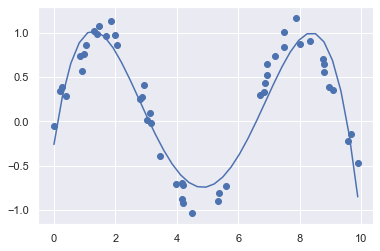

In [11]:
poly_approx=4
yhat,mse,plm=r.polyReg(Xnl,Ynl,poly_approx,table=True,Plot=True)

## Univariate Gaussian Regression

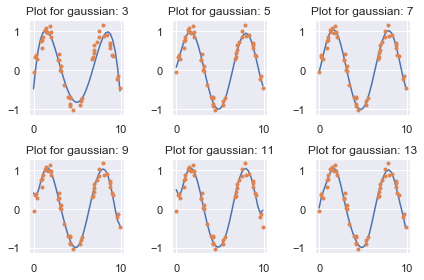

In [12]:
for i in range(len(powers)):
    r.gaussReg(Xnl,Ynl,powers_to_plot,powers[i],Diagn=True)

R2 Train:  0.78, R2 Test:  0.26, MSE:  1.10
y = [-886.0121] + 2132.2035x^0 + -2877.8084x^1 + 2131.9409x^2


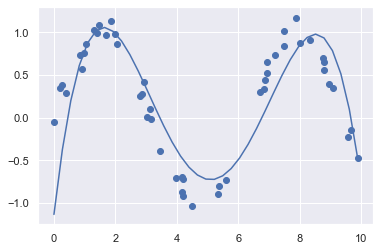

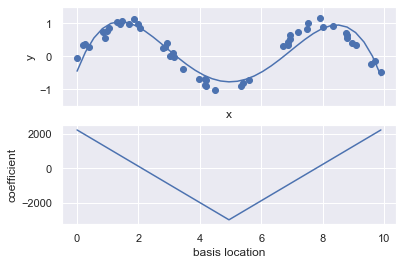

In [13]:
gauss_approx=3
yhat,mse,glm=r.gaussReg(Xnl,Ynl,g_approx=gauss_approx,table=True,Plot=True)

R2 Train:  0.98, R2 Test:  0.91, MSE:  0.83
y = [157.0699] + -731.5533x^0 + 1973.9437x^1 + -3540.0093x^2 + 4637.9587x^3 + -5122.5698x^4 + 4605.0941x^5 + -3497.5767x^6 + 1947.7821x^7 + -725.0809x^8


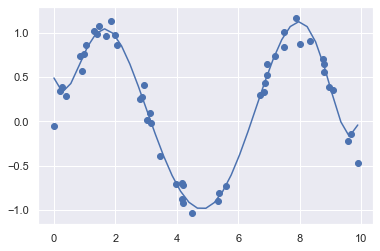

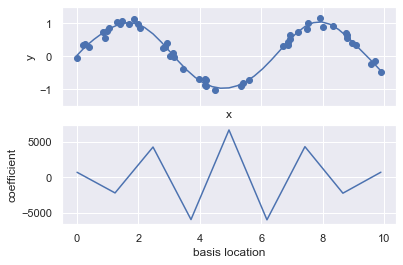

In [14]:
yhat,mse,glm=r.gaussReg(Xnl,Ynl,g_approx=gauss_approx*3,table=True,Plot=True)

## Uni-Multivariate Ridge Regression

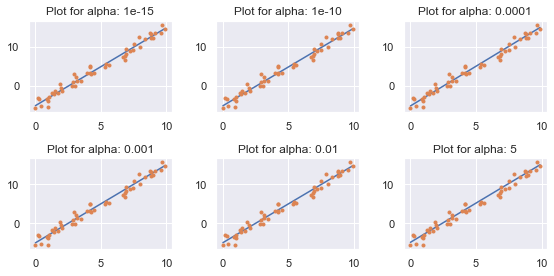

In [15]:
X,Y=r.splitMatrix(data2,'yl')
for i in range(len(alphas)):
    r.ridgeReg(X,Y,alphas_to_plot=alphas_to_plot,
               ridge_a=alphas[i],Diagn=True)
    

y = [2.264] + 0.0804x0


array([[0.08039129]])

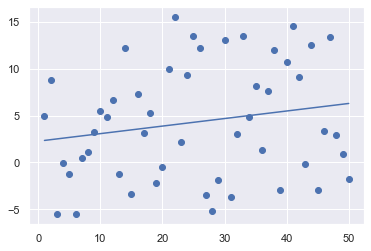

In [61]:
ridge=1
yhat,mse,rlm=r.ridgeReg(X,Y,ridge_a=ridge,table=True,Plot=True,t=1)
rlm.steps[1][1].coef_

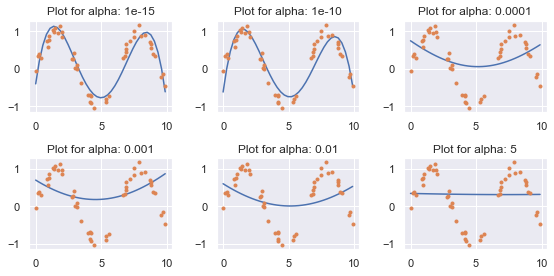

In [17]:
gauss_approx=3
for i in range(len(alphas)):
    r.ridgeReg_gauss(Xnl,Ynl,g_approx=gauss_approx,alphas_to_plot=alphas_to_plot,
               ridge_a=alphas[i],Diagn=True)


R2 Train:  0.84, R2 Test:  0.88, MSE:  0.58
y = [-888.8406] + [ 2138.4849 -2885.8341  2137.955 ]x^0


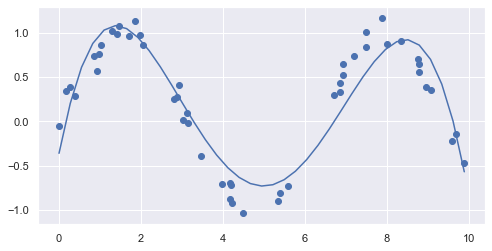

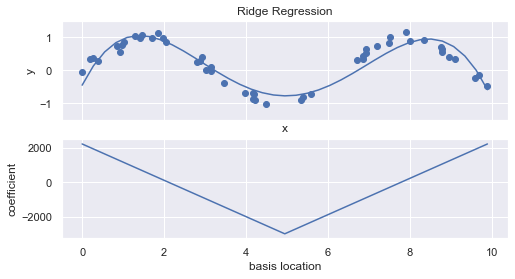

In [18]:
yhat,mse,rlm=r.ridgeReg_gauss(Xnl,Ynl,ridge_a=ridge,table=True,Plot=True)

## Uni-Multivariate Lasso Regression

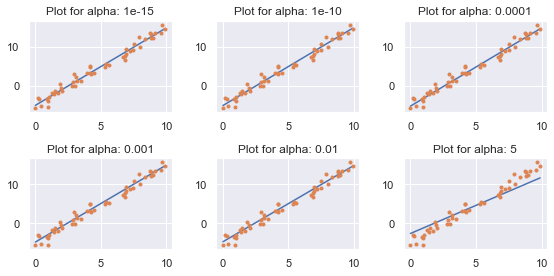

In [19]:
X,Y=r.splitMatrix(data2,'yl')
for i in range(len(alphas)):
    r.lassoReg(X,Y,alphas_to_plot,alphas[i],Diagn=True)


R2 Train:  0.98, R2 Test:  0.97, MSE:  68.75
y = [-4.7067] + 1.9453x0


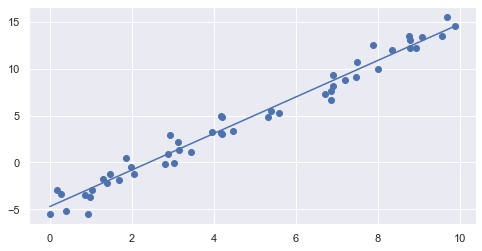

In [20]:
yhat,mse,llm=r.lassoReg(X,Y,alphas[3],table=True,Plot=True)


/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.505331340343862, tolerance: 0.13886296233719267
  positive)
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.567556202198102, tolerance: 0.12589962963405787
  positive)
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.221085209670067, tolerance: 0.15000709284462369
  positive)
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objec

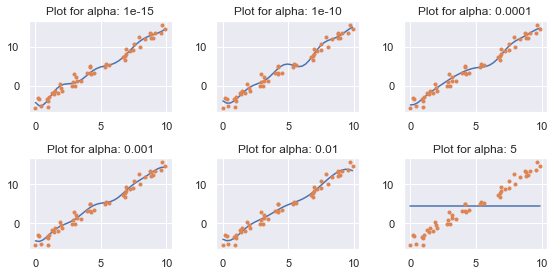

In [21]:
gauss_approx=18
for i in range(len(alphas)):
    r.lassoReg_gauss(X,Y,alphas_to_plot,gauss_approx,alphas[i],Diagn=True)

/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10979708180882179, tolerance: 0.001579301872763989
  positive)
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10241395658876043, tolerance: 0.0013705595201207721
  positive)
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.14195133929376105, tolerance: 0.0013731909899429887
  positive)
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarnin

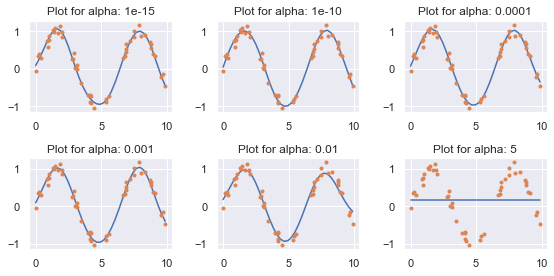

In [22]:
Xnl,Ynl=r.splitMatrix(data2_nl,'yl')
gauss_approx=18
for i in range(len(alphas)):
    r.lassoReg_gauss(Xnl,Ynl,alphas_to_plot,gauss_approx,alphas[i],Diagn=True)

/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003701034198109604, tolerance: 0.0014266064493590404
  positive)
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007624729539001007, tolerance: 0.0020588799451890082
  positive)


R2 Train:  0.98, R2 Test:  0.97, MSE:  0.83
y = [-0.5727] + 0.0x^0 + 0.0x^1 + 0.3094x^2 + 1.1799x^3 + 0.1731x^4 + 0.0x^5 + -0.0x^6 + -0.0x^7 + -0.3063x^8 + -0.2512x^9 + -0.0x^10 + 0.0x^11 + 0.1487x^12 + 0.5995x^13 + 0.8076x^14 + 0.3419x^15 + 0.0x^16 + -0.3893x^17


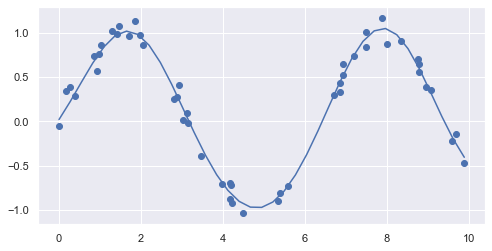

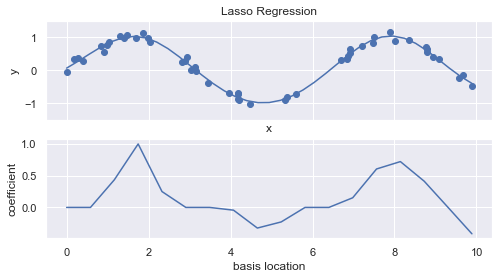

In [23]:
Xnl,Ynl=r.splitMatrix(data2_nl,'yl')
lasso=0.0001
yhat,mse,lglm=r.lassoReg_gauss(Xnl,Ynl,lasso_a=lasso,table=True,Plot=True)

## Uni-Multivariate Elastic Regression

/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.193487439291031, tolerance: 0.12931973492891352
  positive)


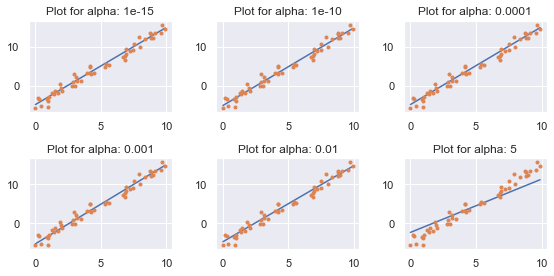

In [24]:
X,Y=r.splitMatrix(data2,'yl')
for i in range(len(alphas)):
    r.elasticReg(X,Y,alphas_to_plot,alphas[i],Diagn=True)


R2 Train:  0.98, R2 Test:  0.97, MSE:  69.92
y = [-4.9486] + 1.9728x0


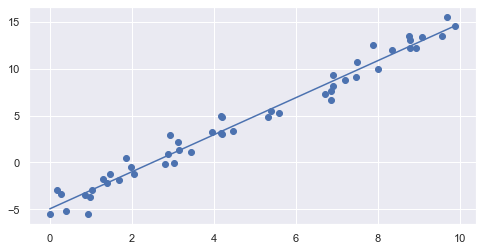

In [25]:
yhat,mse,elm=r.elasticReg(X,Y,alphas[3],table=True,Plot=True)


/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4651015468540694, tolerance: 0.001583879024932888
  positive)
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.24926854534030315, tolerance: 0.0015503572202873112
  positive)
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.477268070974271, tolerance: 0.00155909439847171
  positive)
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Ob

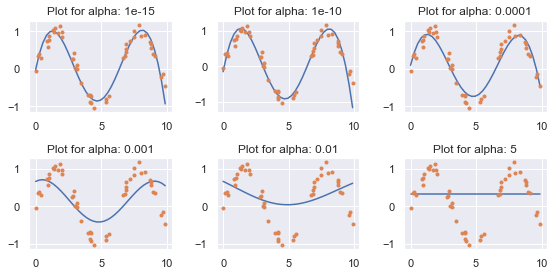

In [26]:
Xnl,Ynl=r.splitMatrix(data2_nl,'yl')
gauss_approx=6
for i in range(len(alphas)):
    r.elasticReg_gauss(Xnl,Ynl,alphas_to_plot,gauss_approx,alphas[i],Diagn=True)

/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.14042569251825743, tolerance: 0.0015562862355695524
  positive)
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.18763535226966652, tolerance: 0.0020588799451890082
  positive)


R2 Train:  0.98, R2 Test:  0.97, MSE:  0.87
y = [0.66] + -0.5139x^0 + -0.6972x^1 + 0.8612x^2 + 0.7662x^3 + -0.1928x^4 + -0.5461x^5 + -0.1254x^6 + -0.0472x^7 + -0.6013x^8 + -0.8591x^9 + -0.2078x^10 + 0.2842x^11 + 0.0082x^12 + -0.2149x^13 + 0.331x^14 + 0.7573x^15 + -0.0314x^16 + -1.5547x^17


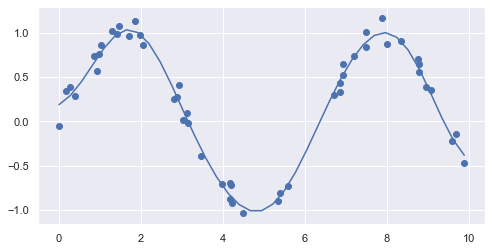

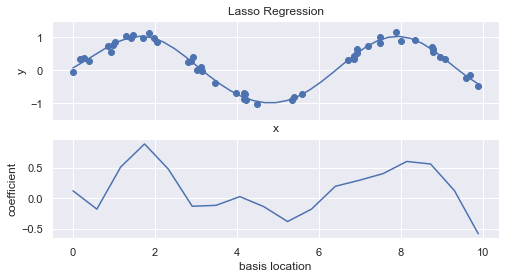

In [27]:
alpha=1e-10
yhat,mse,elm=r.elasticReg_gauss(Xnl,Ynl,alpha=alpha,table=True,Plot=True)


# GridSearch for Hyperparameter Tuning

### Multivariate Linear and Polinomial Models    

In [28]:
data=pd.DataFrame()
data['xl']=xl
data['zl']=yl*0.7+1
data['yl']=yl

data_nl=pd.DataFrame()
data_nl['xl']=xnl
data_nl['zl']=ynl*0.7+1
data_nl['yl']=ynl

print(data.shape[1])

3


In [29]:
glin=r.gridSearch(data,'yl',r.linreg_GS)
print(glin.result)
r.getEquation(glin.model)


{'linearregression__normalize': False, 'linearregression__fit_intercept': True}
y = [-1.42857143] + 0.0x^1 + 1.4286x^2


In [30]:
#xfit = np.linspace(xnl.min(), xnl.max(), ynl.shape[0])
#yfit = glin.model.fit(Xnl, Ynl).predict(xfit[:, np.newaxis])
        

In [31]:
glingau=r.gridSearch(data_nl,'yl',r.linreg_GS_gauss)
print(glingau.result)
r.getEquation(glingau.model)


{'linearregression__normalize': True, 'linearregression__fit_intercept': True, 'gaussianfeatures__width_factor': 1.6666666666666667, 'gaussianfeatures__N': 4}
y = [-8.53237246] + 3.8532x^1 + 14.7566x^2 + -33.094x^3 + 65.1015x^4


/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [-0.05160979         nan  0.59589324         nan]
  category=UserWarning


In [32]:
glinpol=r.gridSearch(data_nl,'yl',r.linreg_GS_poly)
print(glinpol.result)
r.getEquation(glinpol.model)


{'polynomialfeatures__degree': 5, 'linearregression__normalize': True, 'linearregression__fit_intercept': True}
y = [-1.42857143] + 0.0x^1 + -0.0x^2 + 1.4286x^3 + 0.0x^4 + 0.0x^5 + 0.0x^6 + -0.0x^7 + -0.0x^8 + -0.0x^9 + 0.0x^10 + 0.0x^11 + 0.0x^12 + 0.0x^13 + 0.0x^14 + -0.0x^15 + -0.0x^16 + -0.0x^17 + -0.0x^18 + -0.0x^19 + 0.0x^20 + 0.0x^21


### Multivariate Lasso, Ridge, and Elastic Models    

In [33]:

glasso=r.gridSearch(data_nl,'yl',r.lassoReg_GS)
print(glasso.result)
r.getEquation(glasso.model)


{'lasso__fit_intercept': True, 'lasso__alpha': 0.7778}
y = [0.22757812] + -0.0x^1 + 0.0x^2


In [34]:
gridge=r.gridSearch(data_nl,'yl',r.ridgeReg_GS)
print(gridge.result)
r.getEquation(gridge.model)


{'ridge__fit_intercept': True, 'ridge__alpha': 0.334}
y = [-1.36102907] + -0.0004x^1 + 1.3725x^2


In [35]:
gelast=r.gridSearch(data_nl,'yl',r.elasticReg_GS)
print(gelast.result)
r.getEquation(gelast.model)




{'elasticnet__l1_ratio': 0.6, 'elasticnet__fit_intercept': True, 'elasticnet__alpha': 0.112}
y = [-0.71413286] + -0.0037x^1 + 0.8767x^2
